In [1]:
!pip install neurogym

     |████████████████████████████████| 79 kB 866 kB/s eta 0:00:01
  Created wheel for neurogym: filename=neurogym-0.0.2-py3-none-any.whl size=118576 sha256=32a1b0ebda33116cd9e19dd0c99e9976f743572d2413a6463e502f99a2219b05
  Stored in directory: /home/harikrishna/.cache/pip/wheels/c0/29/2c/115db51fb9921de5724b3e0e4256cb743410536117cca54a23
Successfully built neurogym


<OrderEnforcing<PerceptualDecisionMaking>>


findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font f

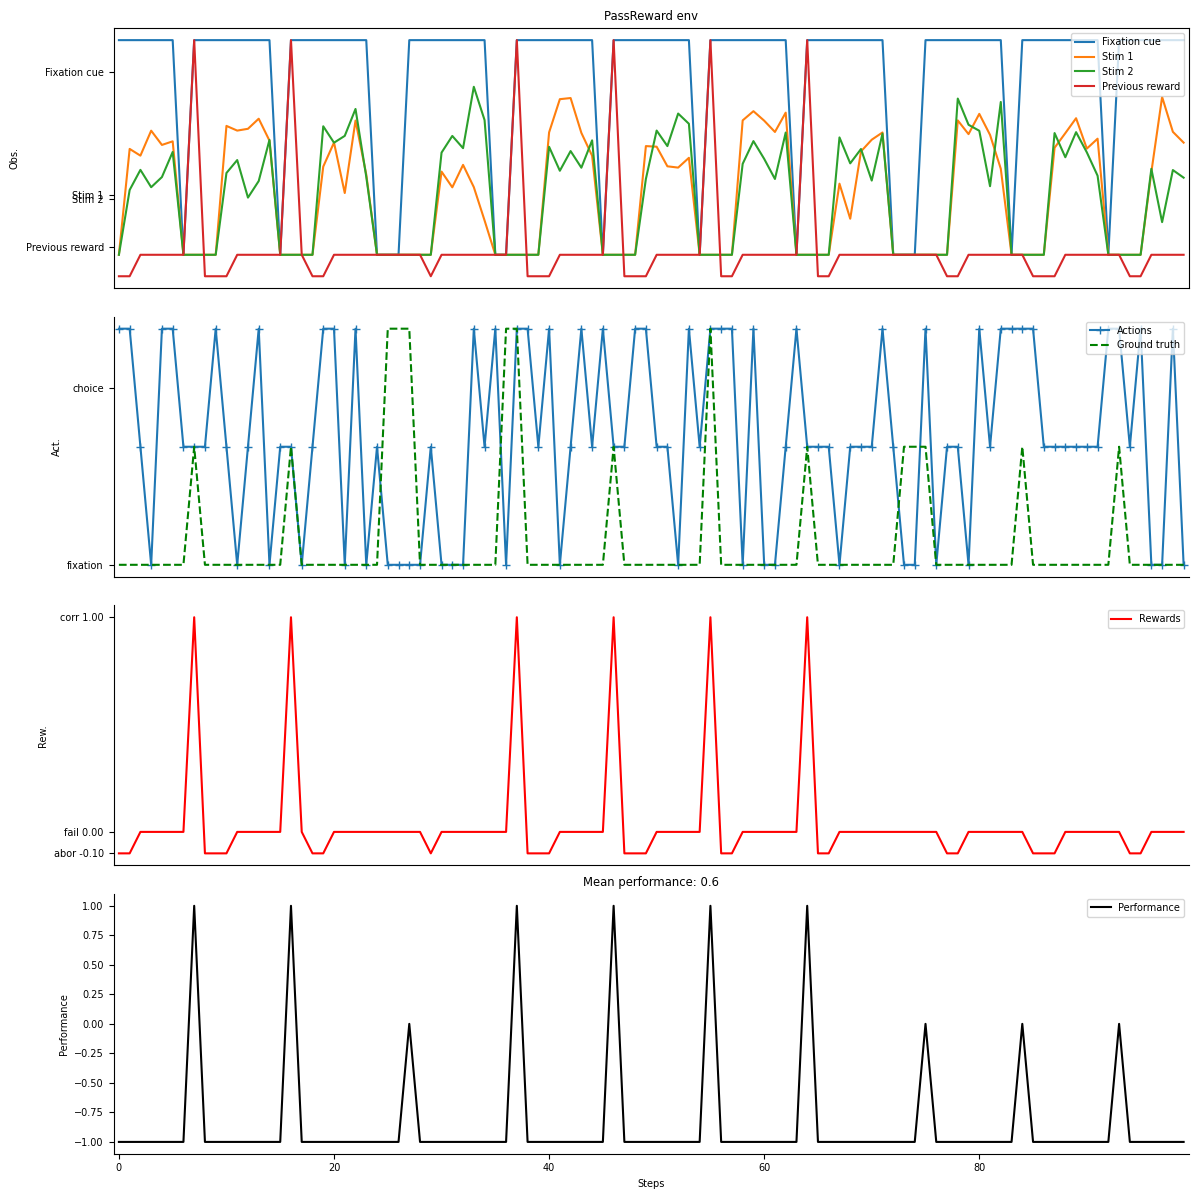

In [2]:
import gym
import neurogym as ngym
from neurogym.wrappers import pass_reward
import warnings
warnings.filterwarnings('ignore')
# Task name
name = 'PerceptualDecisionMaking-v0'
# task specification (here we only specify the duration of the different trial periods)
timing = {'fixation': ('constant', 300),
          'stimulus': ('constant', 500),
          'decision': ('constant', 300)}
kwargs = {'dt': 100, 'timing': timing}
# build task
env = gym.make(name, **kwargs)
# print task properties
print(env)
# wrapp task with pass-reward wrapper
env = pass_reward.PassReward(env)
# plot example trials with random agent
data = ngym.utils.plot_env(env, fig_kwargs={'figsize': (12, 12)}, num_steps=100, ob_traces=['Fixation cue', 'Stim 1', 'Stim 2', 'Previous reward'])

In [ ]:
import torch
import torch.nn as nn
import numpy as np

class Agent(nn.Module):
    def __init__(self, envs, gaussian=False):
        super().__init__()

        self.is_gaussian = gaussian

        self.critic = nn.Sequential(
            layer_init(nn.Linear(np.array(envs.single_observation_space.shape).prod(), 256)),
            nn.Tanh(),
            layer_init(nn.Linear(256, 256)),
            nn.Tanh(),
            layer_init(nn.Linear(256, 1), std=1.0),
        )

        self.actor = nn.Sequential(
            layer_init(nn.Linear(np.array(envs.single_observation_space.shape).prod(), 256)),
            nn.Tanh(),
            layer_init(nn.Linear(256, 256)),
            nn.Tanh(),
            BetaHead(256, np.prod(envs.single_action_space.shape)),
        )

    def expand_layer(self, network, layer_idx, new_out_features):
        """ Expands a given layer and updates the next layer's input features """
        old_layer = network[layer_idx]
        next_layer = network[layer_idx + 2]  # Skip activation function (Tanh)

        if not isinstance(old_layer, nn.Linear) or not isinstance(next_layer, nn.Linear):
            raise ValueError(f"Layers at indices {layer_idx} and {layer_idx+2} must be Linear layers.")

        in_features = old_layer.in_features
        old_out_features = old_layer.out_features

        # Expand first layer
        new_layer = nn.Linear(in_features, new_out_features)
        new_layer.weight.data[:old_out_features, :] = old_layer.weight.data
        new_layer.bias.data[:old_out_features] = old_layer.bias.data
        nn.init.xavier_uniform_(new_layer.weight.data[old_out_features:, :])
        nn.init.zeros_(new_layer.bias.data[old_out_features:])

        # Expand second layer (update input features)
        old_next_weights = next_layer.weight.data.clone()
        old_next_bias = next_layer.bias.data.clone()

        new_next_layer = nn.Linear(new_out_features, next_layer.out_features)
        new_next_layer.weight.data[:, :old_out_features] = old_next_weights
        new_next_layer.bias.data = old_next_bias
        nn.init.xavier_uniform_(new_next_layer.weight.data[:, old_out_features:])
        
        # Replace layers in network
        network[layer_idx] = new_layer
        network[layer_idx + 2] = new_next_layer  # Skip activation function

    def expand_actor(self, layer_idx, new_out_features):
        self.expand_layer(self.actor, layer_idx, new_out_features)

    def expand_critic(self, layer_idx, new_out_features):
        self.expand_layer(self.critic, layer_idx, new_out_features)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import math
from util import layer_init, BetaHead, make_env

import gym
import trp_env
import tiny_homeostasis
import thermal_regulation

seed_ = (1 + 1) * 1
envs = gym.vector.SyncVectorEnv(
    [make_env(env_id='SmallLowGearAntTRP-v0',
                seed=seed_ + i,
                idx=i,
                capture_video=False,
                run_name='test',
                max_episode_steps=60_000,
                gaussian_policy=False) for i in range(1)]
)

agent = Agent(envs=envs, gaussian=False)
agent.load_state_dict(torch.load('./models/SmallLowGearAntTRP-v0__ppo__0__1741093440.pth'))


findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.


action: 1, gt: 1, reward: 1.0, stim1: 0.0, stim2: 0.0, fixation: 1.0
action: 1, gt: 1, reward: 1.0, stim1: 0.0, stim2: 0.0, fixation: 1.0
action: 2, gt: 2, reward: 1.0, stim1: 0.0, stim2: 0.0, fixation: 1.0
action: 1, gt: 1, reward: 1.0, stim1: 0.0, stim2: 0.0, fixation: 1.0
action: 2, gt: 2, reward: 1.0, stim1: 0.0, stim2: 0.0, fixation: 1.0
action: 1, gt: 1, reward: 1.0, stim1: 0.0, stim2: 0.0, fixation: 1.0
action: 2, gt: 2, reward: 1.0, stim1: 0.0, stim2: 0.0, fixation: 1.0
action: 2, gt: 2, reward: 1.0, stim1: 0.0, stim2: 0.0, fixation: 1.0
action: 2, gt: 2, reward: 1.0, stim1: 0.0, stim2: 0.0, fixation: 1.0
[<Axes: > <Axes: > <Axes: >]
Figure(2000x1200)


findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font f

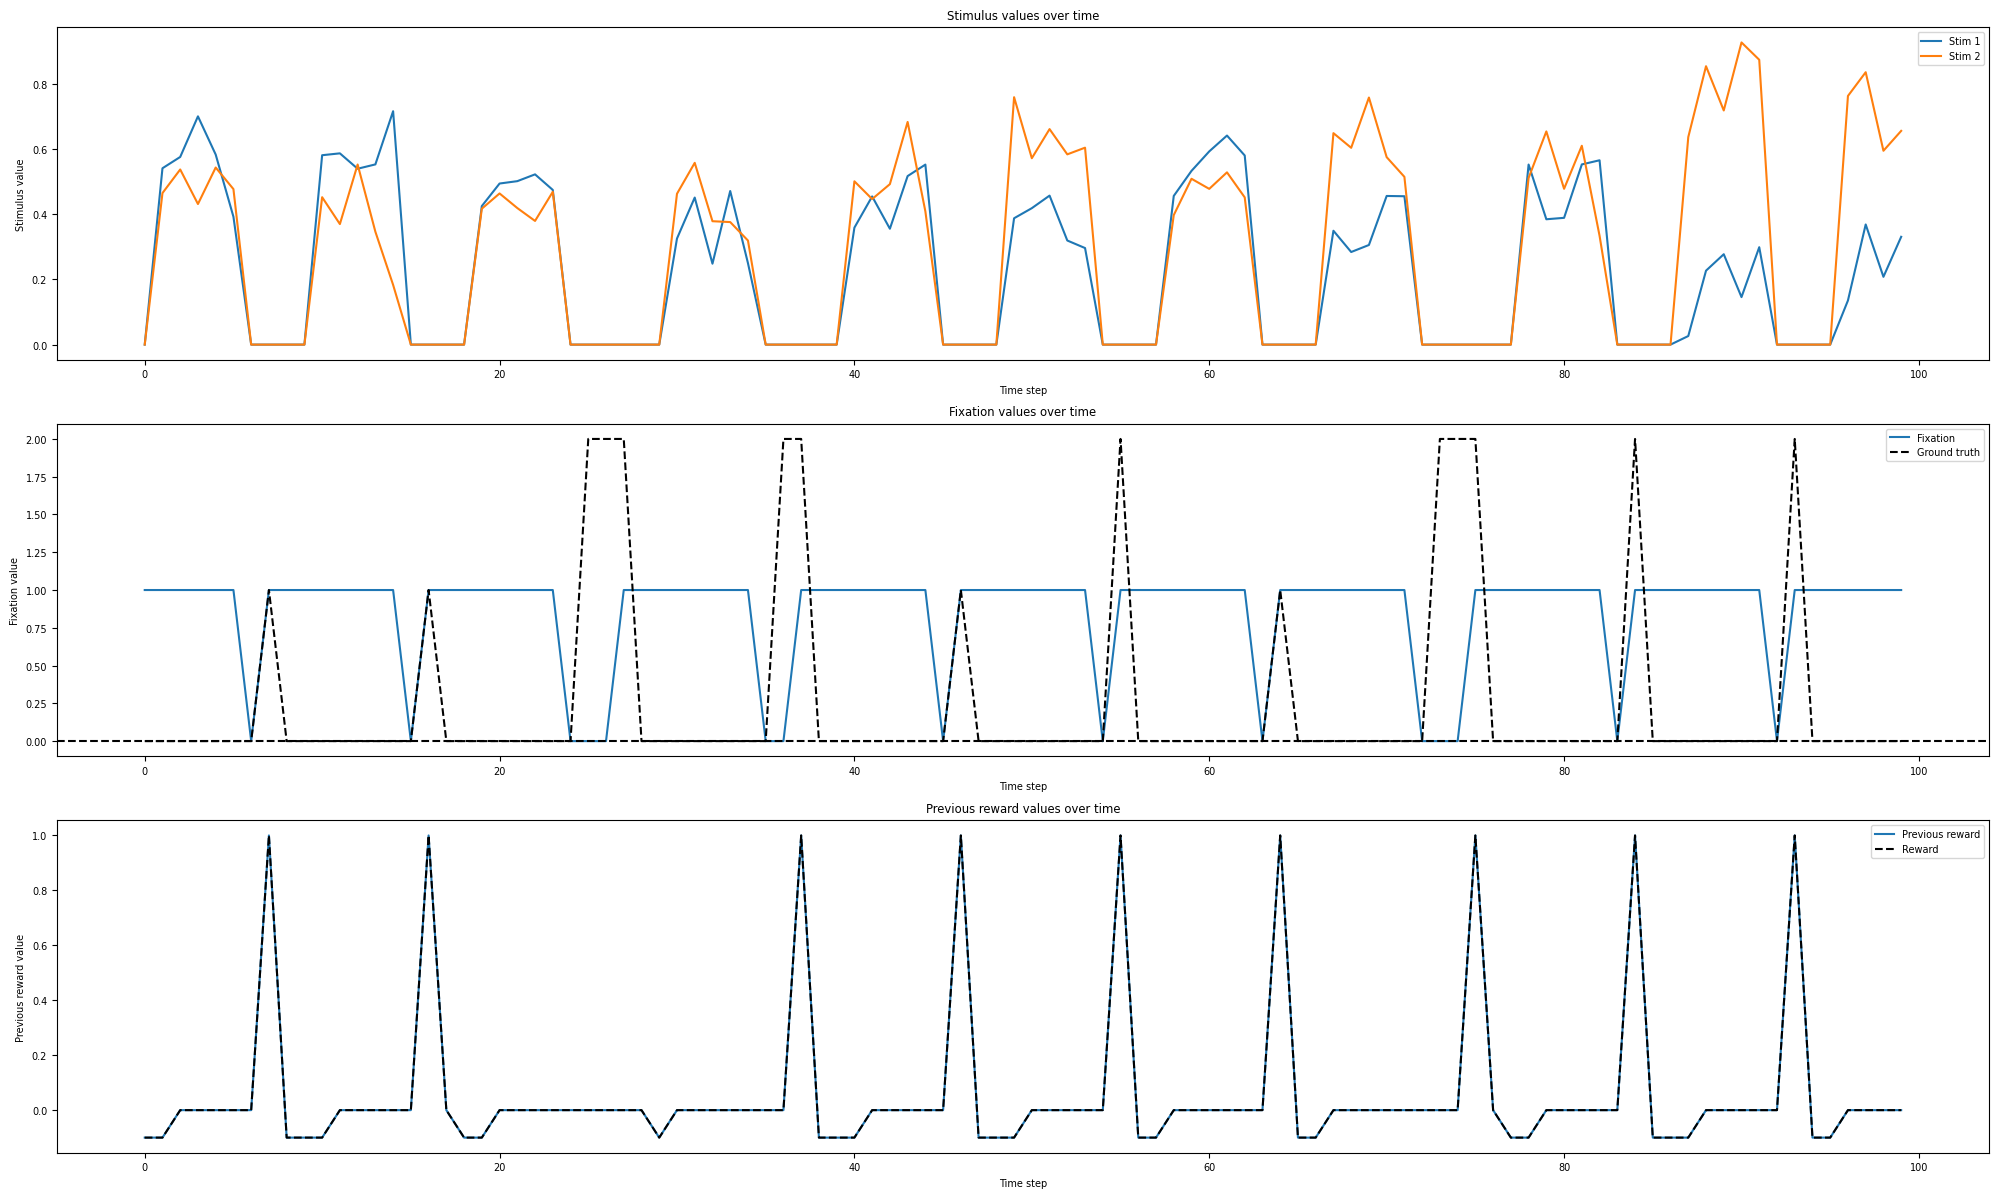

In [39]:
env.reset()
stimuli1 = []
stimuli2 = []
fixation = []
prev_reward = []
rewards = []
actions = []
gts = []


for i in range(100):
    # take random action
    action = env.action_space.sample()
    # step the environment
    obs, reward, done, info = env.step(action)
    # print(info)
    
    fixation.append(obs[0])
    prev_reward.append(obs[3])

    stimuli1.append(obs[1])
    stimuli2.append(obs[2])
    
    rewards.append(reward)
    actions.append(action)
    gts.append(info['gt'])
    
    if reward == 1:
        print(f"action: {action}, gt: {info['gt']}, reward: {reward}, stim1: {obs[1]}, stim2: {obs[2]}, fixation: {obs[0]}")
    # print observation
    # print(obs, action)
    if done:
        break
    
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 1, figsize=(20, 12))

print(ax)
print(fig)
ax[0].plot(stimuli1, label='Stim 1')
ax[0].plot(stimuli2, label='Stim 2')

ax[0].set_xlabel('Time step')
ax[0].set_ylabel('Stimulus value')
ax[0].set_title('Stimulus values over time')
ax[0].legend()


# plt.subplot(2, 1, 2)
ax[1].plot(fixation, label='Fixation') 
# ax[1].plot(actions, label='Action')   
ax[1].plot(gts, label='Ground truth', linestyle='--', color='black')
ax[1].axhline(y=0, color='k', linestyle='--')
ax[1].set_xlabel('Time step')
ax[1].set_ylabel('Fixation value')
ax[1].set_title('Fixation values over time')
ax[1].legend()

# plt.subplot(3, 1, 3)
ax[2].plot(prev_reward, label='Previous reward')
ax[2].plot(rewards, label='Reward', linestyle='--', color='black')
# ax[2].axhline(y=0, color='k', linestyle='--')
ax[2].set_xlabel('Time step')
ax[2].set_ylabel('Previous reward value')
ax[2].set_title('Previous reward values over time')
ax[2].legend()
plt.tight_layout()


